###  NLP - Analise de sentimentos em resenhas de filmes e séries
Vamos criar um analisador de sentimentos, ou seja, um modelo de Machine Learning capaz de analisar um determinado texto e classificá-lo de acordo com o sentimento, se a pessoa gostou ou não do texto\
Link da base de dados: https://www.kaggle.com/datasets/luisfredgs/imdb-ptbr?resource=download

In [1]:
import pandas as pd

In [2]:
resenha = pd.read_csv("imdb-reviews-pt-br.csv")
resenha.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [3]:
#Repartindo dados de treino e teste

from sklearn.model_selection import train_test_split

treino, teste, classe_treino, classe_teste = train_test_split(resenha.text_pt,
                                                             resenha.sentiment,
                                                             random_state =42)

In [4]:
treino

1348     Embora o filme tenha sido apenas assim, o clos...
27466    Este é provavelmente um dos piores filmes que ...
29998    De vez em quando, um filme irá varrer ao seu r...
48186    Este é um conto completamente diabólico de quã...
26473    Lenta, chata, extremamente repetitiva. Não adm...
                               ...                        
11284    Naach teria ganhado um Razzie para o Pior Film...
44732    Apenas assisti a esse filme em DVD e achei a a...
38158    Melhor show desde Seinfeld. Ela é realmente mu...
860      Eu pareço estar discordando com muitas pessoas...
15795    Minhas duas filhas de 11 e 13 anos e eu tive s...
Name: text_pt, Length: 37094, dtype: object

In [5]:
teste

12532    Isso era incomum: um filme moderno que era ult...
35445    Alguns dos meus velhos amigos sugeriram que eu...
20279    Que prazer. Isto é realmente uma paródia. Some...
2969     Há cerca de dez minutos a meio da Strangeland,...
45161    Otelo, a clássica história de Shakespearen sob...
                               ...                        
16421    Crescendo como filho do cinema, uma das trilog...
39861    Este filme é o melhor filme de todos os tempos...
309      "Electra Glide in Blue" é um movimento lento e...
20638    Eu amo esse filme ! Eu acho que já vi 5 vezes ...
38935    Eu vi alguns filmes sobre transtornos alimenta...
Name: text_pt, Length: 12365, dtype: object

In [6]:
classe_teste

12532    pos
35445    neg
20279    pos
2969     neg
45161    pos
        ... 
16421    pos
39861    pos
309      neg
20638    pos
38935    pos
Name: sentiment, Length: 12365, dtype: object

In [7]:
#Rodando desta forma, irá apresentar erro de conversão de string em float

'''
from sklearn.linear_model import LogisticRegression

regressao_logistica = LogisticRegression()
regressao_logistica.fit(treino, classe_treino)
acuracia = regressao_logistica.score(teste, classe_teste)
acuracia
'''

'\nfrom sklearn.linear_model import LogisticRegression\n\nregressao_logistica = LogisticRegression()\nregressao_logistica.fit(treino, classe_treino)\nacuracia = regressao_logistica.score(teste, classe_teste)\nacuracia\n'

In [8]:
#Printando uma resenha negativa para analise inicial
print("Negativa \n")
print(resenha.text_pt[189])

Negativa 

Este é sem dúvida o pior filme que eu já vi. E acredite em mim, eu vi muitos filmes. A reviravolta inacreditável que o filme faz - passando de um extremamente mau filme "Formas de vida alienígenas habitam a terra", com um filme que tenta espalhar um arquicristiano "O dia do julgamento está próximo, buscar Jesus ou queimar por toda a eternidade em as dívidas ardentes do inferno "mensagem - deixou-me atordoado depois de ter sido atormentado por 85 minutos. Até mesmo os cristãos religiosos devem se envergonhar ou ficar furiosos ao ver suas crenças postadas dessa maneira. Eu não sabia o que fazer comigo quando assisti a atuação horrível que poderia ter sido realizada por crianças de 7 anos de idade. Simplesmente repugnante. Eu não sou cristão nem muito religioso. Mas se eu estivesse, não teria mais medo do Inferno. Rich Christiano mostrou ser algo muito pior.


In [9]:
print("Positivo \n")
print(resenha.text_pt[49002])

Positivo 

Crescendo em Nova York no final dos anos 80 e início dos anos 90, posso dizer pessoalmente que este é um dos documentários mais importantes feitos para cobrir esse lugar neste período de tempo. Não Madonna não veio com a idéia de Voguing, mas é de onde ela tirou! Em vez de combater a violência uns dos outros ou em brigas de gato, o voguing permitia que as pessoas "lutassem" dentro dos confins de tudo, menos que tocassem umas às outras, o que justificaria uma desqualificação automática. Vendo este tipo de extraordinariamente talentosas / bem orquestradas "jogadas" nos clubes foi nada menos do que espetacular e todos os grandes nomes de antigamente estão aqui ... Pepper La Beija, Paris Duprée, Xtragavaganza, etc. ..tudo comemorado nos gostos de peças de época como a música de Malcom McLarens "Deep in Vogue" ... não importava quem você era, ou de onde você era porque quando você passava por aquelas portas nesse "reino mágico" de De certa forma, você se tornou parte de algo maio

In [10]:
#conhecendo a distribuição da classificação
#perceba que os dados estão balanceados

print(resenha.sentiment.value_counts())

neg    24765
pos    24694
Name: sentiment, dtype: int64


In [11]:
#Trocando as infos de sentiment neg=0 e pos=1

classificacao = resenha["sentiment"].replace(["neg", "pos"], [0, 1])


In [12]:
resenha["classificacao"] = classificacao

In [13]:
resenha.tail()

,id,text_en,text_pt,sentiment,classificacao
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1
49458,49460,Working-class romantic drama from director Mar...,O drama romântico da classe trabalhadora do di...,pos,1


### Bag of Words - Tradução das resenhas para a linguagem de máquina
Relação entre a linguagem humana e a linguagem de máquina.
Como os programas de computador vão processar a linguagem natural

In [14]:
#Tradução do texto para a linguagem de máquina
#corpustextual é o conjunto de todas as frases
#vocabulário todas as palavras do corpustextual, sem repetiçoes

In [15]:
#DataFrame.sparse.from_spmatrix
#pandas.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names_out())

from sklearn.feature_extraction.text import CountVectorizer

#corpus
texto = ["Assisti um filme ótimo", "Assisti um filme ruim"]

#aplicando o count vectorizer
vetorizar = CountVectorizer(lowercase=False)

#criando bag of words
bag_of_words = vetorizar.fit_transform(texto)

In [16]:
#por padrão a vetorização ja transforma tudo em minusculo
vetorizar.get_feature_names()

['Assisti', 'filme', 'ruim', 'um', 'ótimo']

In [17]:
#matriz sparse é uma Matrix cheia de zeros
#Criando uma matriz esparsa

from scipy.sparse import csr_matrix

matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names())
matriz_esparsa

,Assisti,filme,ruim,um,ótimo
0,1,1,0,1,1
1,1,1,1,1,0


### Aplicando o Bag of Words na base do IMDB

Vetorizando dados de teste e de treino

In [18]:
#aplicando o count vectorizer, com parametro max_features que traz as palavras que aparecem com maior frequencia, dentro do treshold
vetorizar = CountVectorizer(lowercase=False, max_features=50)

#criando bag of words (vetor)
bag_of_words = vetorizar.fit_transform(resenha.text_pt)
print(bag_of_words.shape)

(49459, 50)


In [19]:
'''
#Código funcionou, acuracia de 0.65%
#Aplicando bag of words com a regressão logistica
from sklearn.linear_model import LogisticRegression

#aplicando o count vectorizer, com parametro max_features que traz as palavras que aparecem com maior frequencia, dentro do treshold
vetorizar = CountVectorizer(lowercase=False, max_features=50)

#criando bag of words (vetor)
bag_of_words = vetorizar.fit_transform(resenha.text_pt)


treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
                                                             resenha.classificacao,
                                                             random_state =42)


regressao_logistica = LogisticRegression()
regressao_logistica.fit(treino, classe_treino)
acuracia = regressao_logistica.score(teste, classe_teste)
acuracia
'''

'\n#Código funcionou, acuracia de 0.65%\n#Aplicando bag of words com a regressão logistica\nfrom sklearn.linear_model import LogisticRegression\n\n#aplicando o count vectorizer, com parametro max_features que traz as palavras que aparecem com maior frequencia, dentro do treshold\nvetorizar = CountVectorizer(lowercase=False, max_features=50)\n\n#criando bag of words (vetor)\nbag_of_words = vetorizar.fit_transform(resenha.text_pt)\n\n\ntreino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,\n                                                             resenha.classificacao,\n                                                             random_state =42)\n\n\nregressao_logistica = LogisticRegression()\nregressao_logistica.fit(treino, classe_treino)\nacuracia = regressao_logistica.score(teste, classe_teste)\nacuracia\n'

In [20]:
#trazer as palavras com maior relevancia semantica dentro dos 50 (max_features)
#Criando função com a mesma funcionalidade do código acima
# 1 - Selecionamos todos os comentários e vetorizamos
# 2 - Divido os dados entre Treino e Teste
# 3- Determino um método de classificação que trabalhe bem com dados esparsos
# 4 - Treino o classificador escolhido, realizo a predição e meço os dados de teste

from sklearn.linear_model import LogisticRegression


def classificar_texto(texto, coluna_texto, coluna_classificacao):
    vetorizar = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vetorizar.fit_transform(texto[coluna_texto])
    treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
                                                             texto[coluna_classificacao],
                                                             random_state =42)

    regressao_logistica = LogisticRegression()
    regressao_logistica.fit(treino, classe_treino)
    return regressao_logistica.score(teste, classe_teste)
    

print(classificar_texto(resenha, "text_pt", "classificacao"))


0.6583097452486858


### WordCloud

Word cloud é uma imagem gerada com as principais palavras de um texto distribuídas em um espaço, de modo que o tamanho de cada palavra é proporcional à sua frequência de aparição nos dados. Ela vai ajudar Júlia a ter ideias de como realizar tratamentos em seu texto para melhorar os resultados.

In [21]:
import sys
print(sys.executable)

/Users/thaismarcondes/opt/anaconda3/bin/python


In [22]:
#!pip install wordcloud
'''
Para corrigir problema na instalação do pacote wordcloud:
1- Abri terminal do jupyter
2- Rodei o código: conda install -c conda-forge wordcloud
'''

from wordcloud import WordCloud

In [23]:
#Criando lista, com todas as palavras da coluna resenha.text_pt (linguiçona)
todas_palavras = [texto for texto in resenha.text_pt]

#Visualizando as 2 primeiras resenhas
todas_palavras[:3]


['Mais uma vez, o Sr. Costner arrumou um filme por muito mais tempo do que o necessário. Além das terríveis seqüências de resgate no mar, das quais há muito poucas, eu simplesmente não me importei com nenhum dos personagens. A maioria de nós tem fantasmas no armário, e o personagem Costers é realizado logo no início, e depois esquecido até muito mais tarde, quando eu não me importava. O personagem com o qual deveríamos nos importar é muito arrogante e superconfiante, Ashton Kutcher. O problema é que ele sai como um garoto que pensa que é melhor do que qualquer outra pessoa ao seu redor e não mostra sinais de um armário desordenado. Seu único obstáculo parece estar vencendo Costner. Finalmente, quando estamos bem além do meio do caminho, Costner nos conta sobre os fantasmas dos Kutchers. Somos informados de por que Kutcher é levado a ser o melhor sem pressentimentos ou presságios anteriores. Nenhuma mágica aqui, era tudo que eu podia fazer para não desligar uma hora.',
 'Este é um exemp

In [24]:
#Criando objeto com todas as frases, separando por espaço

todas_palavras = ' '.join([texto for texto in resenha.text_pt])

#Conferindo o tamanho do objeto
len(todas_palavras)

63448424

In [25]:
#Criando a nuvem de palavras
nuvem_palavras = WordCloud().generate(todas_palavras)

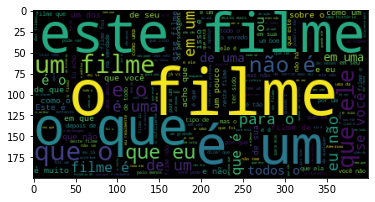

In [26]:
#plotando a nuvem de palavras
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.imshow(nuvem_palavras)
plt.show()

### Otimizando a visualização da WordCloud

In [27]:
# "width" e "height" definem o tamanho/espaço onde minhas palavras serão distribuídas
# "max_font_size"define o tamanho da fonte da maior palavra na minha wordcloud
# "collocations" define se exibição será por bigrama ou por palavras

from wordcloud import WordCloud
%matplotlib inline

todas_palavras = ' '.join([texto for texto in resenha.text_pt])

nuvem_palavras = WordCloud(width=800, height = 500,
                          max_font_size=110,
                          collocations = False).generate(todas_palavras)

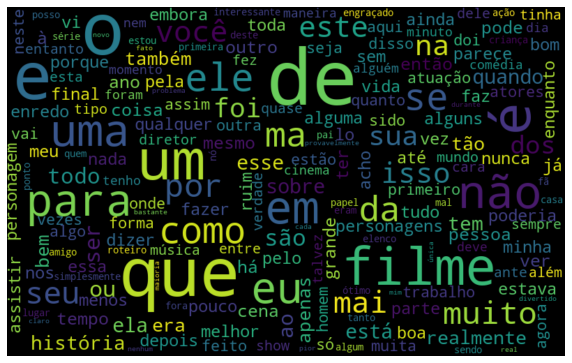

In [28]:
# "figsize" altera o tamanho da minha imagem
# "interpolation" usa algoritimo para deixar a imagem mais nítida

import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis("off") #retirando os números dos eixos laterais
plt.show()

### Separando wordcloud para sentimento positivo e para sentimentos negativos

In [29]:
#buscando todas as linhas que contem sentimento positivo
resenha.query("sentiment == 'pos'")

,id,text_en,text_pt,sentiment,classificacao
12389,12391,I went and saw this movie last night after bei...,Eu fui e vi este filme ontem à noite depois de...,pos,1
12390,12392,Actor turned director Bill Paxton follows up h...,"O diretor do ator, Bill Paxton, segue sua prom...",pos,1
12391,12393,As a recreational golfer with some knowledge o...,Como um jogador de recreio com algum conhecime...,pos,1
12392,12394,"I saw this film in a sneak preview, and it is ...","Eu vi esse filme em uma prévia, e é delicioso....",pos,1
12393,12395,Bill Paxton has taken the true story of the 19...,Bill Paxton levou a verdadeira história do gol...,pos,1
...,...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1


In [30]:
#criar função para WordCloud de sentimentos negativos 

def nuvem_palavras_neg(texto, coluna_texto):
    
    texto_negativo = texto.query("sentiment == 'neg'")
    
    todas_palavras = ' '.join([texto for texto in texto_negativo[coluna_texto]])

    nuvem_palavras = WordCloud(width=800, height = 500,
                              max_font_size=110,
                              collocations = False).generate(todas_palavras)
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis("off") #retirando os números dos eixos laterais
    plt.show()

In [31]:
#criar função para WordCloud de sentimentos positivos 

def nuvem_palavras_pos(texto, coluna_texto):
    
    texto_positivo = texto.query("sentiment == 'pos'")
    
    todas_palavras = ' '.join([texto for texto in texto_positivo[coluna_texto]])

    nuvem_palavras = WordCloud(width=800, height = 500,
                              max_font_size=110,
                              collocations = False).generate(todas_palavras)
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis("off") #retirando os números dos eixos laterais
    plt.show()

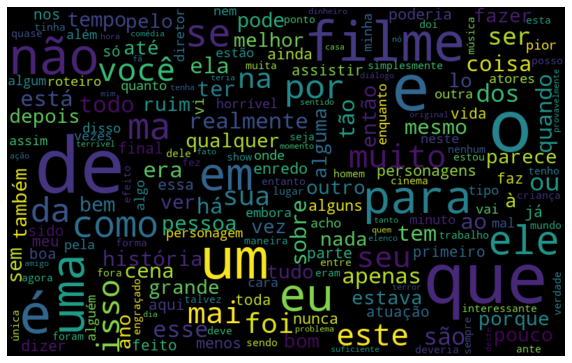

In [32]:
#Visualizando a nuvem negativa
nuvem_palavras_neg(resenha, "text_pt")

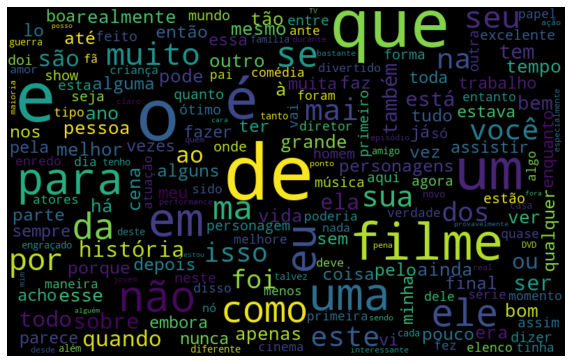

In [33]:
#Visualizando a nuvem positiva
nuvem_palavras_pos(resenha, "text_pt")

### Tokenizando as palavras
A ideia é calcular a frequencia de aparição através da biblioteca nltk

In [34]:
#é necessário fazer o download das bases da biblioteca NLTK em portugues
#nltk.download("all")

In [35]:
#neste exemplo a frase está tokenizada e não as palavras
import nltk

frase = ["um filme bom", "um filme ruim"]
frequencia = nltk.FreqDist(frase)
frequencia

FreqDist({'um filme bom': 1, 'um filme ruim': 1})

In [36]:
#Tokenizando por palavras

from nltk import tokenize

frase = "Bem vindo ao mundo PLN!"

token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(frase)
print(token_frase)

['Bem', 'vindo', 'ao', 'mundo', 'PLN!']


In [37]:
#juntando as palavras com a frequência

token_frase = token_espaco.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_frase) #um dicionario com as palavras e sua frequencia

#criando um dataframe com as palavras e as frequencias do dicionário
df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                             "Frequencia": list(frequencia.values())})
df_frequencia

,Palavra,Frequencia
0,Mais,1538
1,uma,130888
2,"vez,",1927
3,o,244881
4,Sr.,1741
...,...,...
348280,"Muppified,",1
348281,inventora,1
348282,"""Union",1
348283,beirar,1


In [38]:
#usando o nlargest() para obter as palavras mais frequentes

df_frequencia.nlargest(columns = "Frequencia", n=10)

,Palavra,Frequencia
20,de,417651
14,que,325070
42,e,299743
3,o,244881
7,um,216410
102,a,210179
45,é,192381
200,em,132778
1,uma,130888
29,não,127915


### Gerando visualização com Seaborn

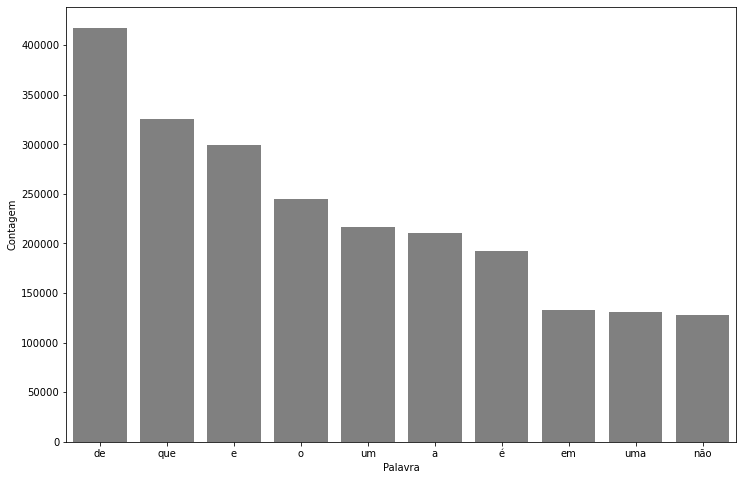

In [39]:
import seaborn as sns

plt.figure(figsize=(12,8))
ax = sns.barplot(data = df_frequencia.nlargest(columns = "Frequencia", n=10), x = "Palavra", y= "Frequencia", color = 'gray')
ax.set(ylabel = "Contagem") #setando o rótulo do eixo Y
plt.show()

### Criando função - Gráfico "Pareto"

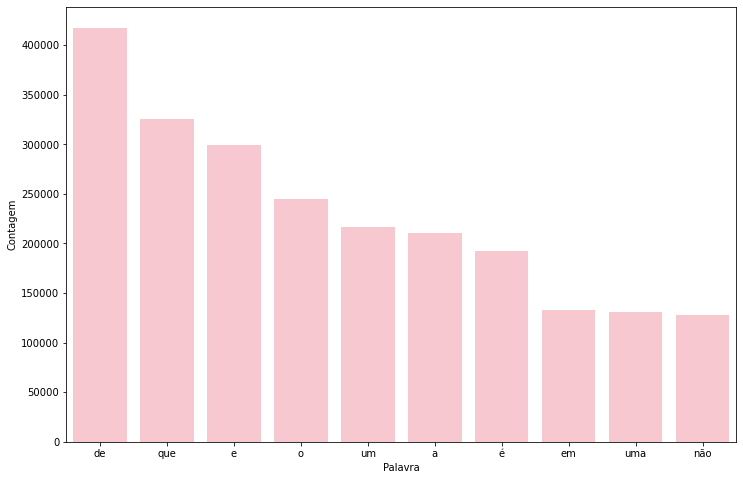

In [40]:
def pareto(texto, coluna_texto, quantidade):
    todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
    token_frase = token_espaco.tokenize(todas_palavras)
    frequencia = nltk.FreqDist(token_frase)
    df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                 "Frequencia": list(frequencia.values())})
    df_frequencia = df_frequencia.nlargest(columns = "Frequencia", n= quantidade)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequencia, x = "Palavra", y = "Frequencia", color = 'pink')
    ax.set(ylabel = "Contagem")
    plt.show()
    
pareto(resenha, "text_pt", 10)

### Dataprep - Removendo Stop Words (remoção de palavras que não agregam ao modelo)

In [41]:
#importando stopwords da biblioteca nltk
palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")

frase_processada = list()

#vou tokenizar as palavras de resenha.text_pt e verificar se pertencem a minha lista de StopWords
for opiniao in resenha.text_pt:
    nova_frase = list()
    palavras_texto = token_espaco.tokenize(opiniao) #separei minha frase em palavras(tokenizei)
    for palavra in palavras_texto:
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra) #uma lista com cada palavra da frase
    frase_processada.append(' '.join(nova_frase)) #Juntando palavras da frase em uma única string

#criando coluna com as frases já processadas, com stopwords removidas
resenha["tratamento_1"] = frase_processada    


In [42]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve..."


In [43]:
#Acuracia subiu para 0.66
classificar_texto(resenha, "tratamento_1", "classificacao")

0.6607359482410028

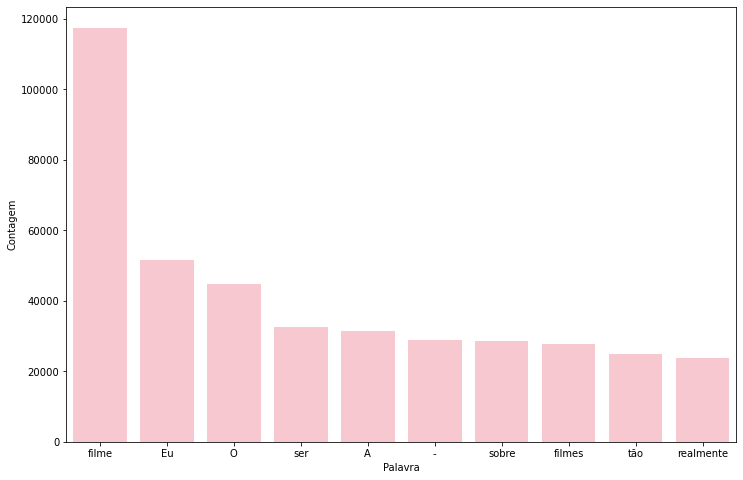

In [44]:
pareto(resenha, "tratamento_1", 10)

### Melhorando a visualização do pareto

Stop words (ou palavras de parada – tradução livre) são palavras que podem ser consideradas "irrelevantes" para um conjunto de texto.\
Os stop words geralmente inclue preposições e artigos, mas não são um conjunto fechado de palavras, você pode adicionar ou remover conforme sua necessidade.\

É necessário retirar a pontuação, pois mesmo usando o CountVectorizer para realizar a representação em Bag of Words, nós criamos a função pareto, que por sua vez não remove a pontuação automaticamente.\
Portanto, para que o pareto represente a frequência das palavras, o mais próximo possível da frequência da representação Bag of Words é importante remover as pontuações do nosso corpus.

In [45]:
'''
Daqui a pouco, vamos aprender a realizar tratamentos para deixarmos a 
contagem de frequência do nosso pareto o mais parecida possível com 
a vetorização do wordcloud e do CountVectorizer().
'''

'\nDaqui a pouco, vamos aprender a realizar tratamentos para deixarmos a \ncontagem de frequência do nosso pareto o mais parecida possível com \na vetorização do wordcloud e do CountVectorizer().\n'

In [46]:
#exemplo de tokenização da pontuação

from nltk import tokenize

frase = "Olá mundo!"
token_pontuacao = tokenize.WordPunctTokenizer()
token_frase = token_pontuacao.tokenize(frase)

print(token_frase)

['Olá', 'mundo', '!']


In [47]:
'''
Exercício:
from nltk import tokenize
frase = "Os cursos da Alura são ótimos, além de ótimos, têm alunos ótimos!"
token_espaco = tokenize.WhitespaceTokenizer()
token_pontuacao = tokenize.WordPunctTokenizer()

token_1 = token_espaco.tokenize(frase)
token_2 = token_pontuacao.tokenize(frase)
'''

'\nExercício:\nfrom nltk import tokenize\nfrase = "Os cursos da Alura são ótimos, além de ótimos, têm alunos ótimos!"\ntoken_espaco = tokenize.WhitespaceTokenizer()\ntoken_pontuacao = tokenize.WordPunctTokenizer()\n\ntoken_1 = token_espaco.tokenize(frase)\ntoken_2 = token_pontuacao.tokenize(frase)\n'

In [48]:
from string import punctuation

pontuacao = list()
for ponto in punctuation:
    pontuacao.append(ponto)

pontuacao_stopwords = pontuacao + palavras_irrelevantes

frase_processada = list()
for opiniao in resenha["tratamento_1"]:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
    
resenha["tratamento_2"] = frase_processada

In [49]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1,tratamento_2
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...


In [50]:
resenha["tratamento_1"][0]

'Mais vez, Sr. Costner arrumou filme tempo necessário. Além terríveis seqüências resgate mar, quais poucas, simplesmente importei nenhum personagens. A maioria fantasmas armário, personagem Costers realizado logo início, esquecido tarde, importava. O personagem deveríamos importar arrogante superconfiante, Ashton Kutcher. O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armário desordenado. Seu único obstáculo parece estar vencendo Costner. Finalmente, bem além meio caminho, Costner conta sobre fantasmas Kutchers. Somos informados Kutcher levado ser melhor pressentimentos presságios anteriores. Nenhuma mágica aqui, tudo podia fazer desligar hora.'

In [51]:
resenha["tratamento_2"][0]

'Mais vez Sr Costner arrumou filme tempo necessário Além terríveis seqüências resgate mar quais poucas simplesmente importei nenhum personagens A maioria fantasmas armário personagem Costers realizado logo início esquecido tarde importava O personagem deveríamos importar arrogante superconfiante Ashton Kutcher O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armário desordenado Seu único obstáculo parece estar vencendo Costner Finalmente bem além meio caminho Costner conta sobre fantasmas Kutchers Somos informados Kutcher levado ser melhor pressentimentos presságios anteriores Nenhuma mágica aqui tudo podia fazer desligar hora'

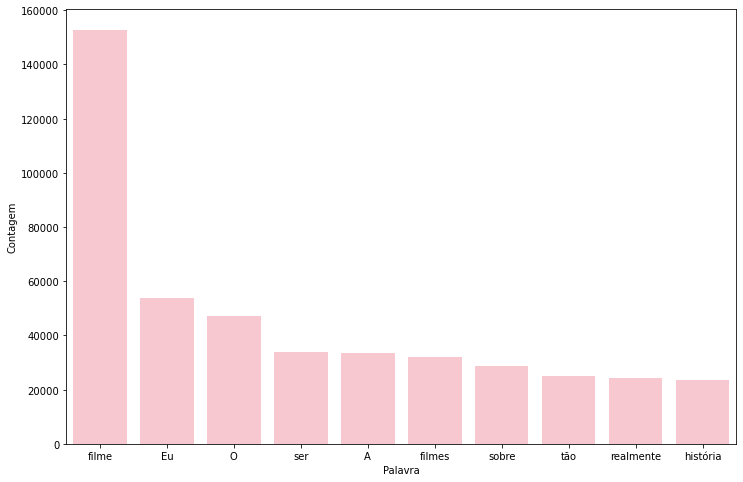

In [52]:
pareto(resenha, "tratamento_2", 10)

In [53]:
# teste de retirada dos acentos
#!pip install unidecode
import unidecode

acentos = "ótimo péssimo não é tão"

teste = unidecode.unidecode(acentos)
print(teste)

otimo pessimo nao e tao


In [54]:
# tratamento de retirada de acentos da minha base

sem_acentos = [unidecode.unidecode(texto) for texto in resenha["tratamento_2"]]
sem_acentos[0]

'Mais vez Sr Costner arrumou filme tempo necessario Alem terriveis sequencias resgate mar quais poucas simplesmente importei nenhum personagens A maioria fantasmas armario personagem Costers realizado logo inicio esquecido tarde importava O personagem deveriamos importar arrogante superconfiante Ashton Kutcher O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armario desordenado Seu unico obstaculo parece estar vencendo Costner Finalmente bem alem meio caminho Costner conta sobre fantasmas Kutchers Somos informados Kutcher levado ser melhor pressentimentos pressagios anteriores Nenhuma magica aqui tudo podia fazer desligar hora'

In [55]:
#retirando os acentos das stopwords
stopwords_sem_acento = [unidecode.unidecode(texto) for texto in pontuacao_stopwords]
stopwords_sem_acento

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~',
 'de',
 'a',
 'o',
 'que',
 'e',
 'e',
 'do',
 'da',
 'em',
 'um',
 'para',
 'com',
 'nao',
 'uma',
 'os',
 'no',
 'se',
 'na',
 'por',
 'mais',
 'as',
 'dos',
 'como',
 'mas',
 'ao',
 'ele',
 'das',
 'a',
 'seu',
 'sua',
 'ou',
 'quando',
 'muito',
 'nos',
 'ja',
 'eu',
 'tambem',
 'so',
 'pelo',
 'pela',
 'ate',
 'isso',
 'ela',
 'entre',
 'depois',
 'sem',
 'mesmo',
 'aos',
 'seus',
 'quem',
 'nas',
 'me',
 'esse',
 'eles',
 'voce',
 'essa',
 'num',
 'nem',
 'suas',
 'meu',
 'as',
 'minha',
 'numa',
 'pelos',
 'elas',
 'qual',
 'nos',
 'lhe',
 'deles',
 'essas',
 'esses',
 'pelas',
 'este',
 'dele',
 'tu',
 'te',
 'voces',
 'vos',
 'lhes',
 'meus',
 'minhas',
 'teu',
 'tua',
 'teus',
 'tuas',
 'nosso',
 'nossa',
 'nossos',
 'nossas',
 'dela',
 'delas',
 'esta',
 'estes',
 'estas',
 'aquele',
 

In [56]:
#criando coluna sem acento
resenha["tratamento_3"] = sem_acentos

#passando o reprocessamento tirando os stopwords

frase_processada = list()
for opiniao in resenha["tratamento_3"]:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
    
resenha["tratamento_3"] = frase_processada

resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1,tratamento_2,tratamento_3
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...,Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes acao mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...,Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever musicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...,Filmes fotos latao palavra apropriada verdade ...


In [57]:
#Verificando acuracia do tratamento 3 (tiramos acentuação)
acuracia_tratamento3 = classificar_texto(resenha, "tratamento_3", "classificacao")
print(acuracia_tratamento3)

0.6810351799433886


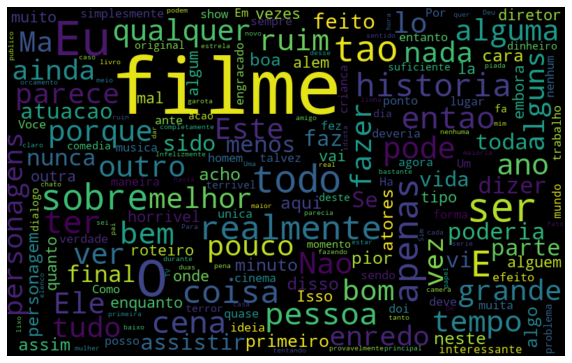

In [58]:
nuvem_palavras_neg(resenha, "tratamento_3")

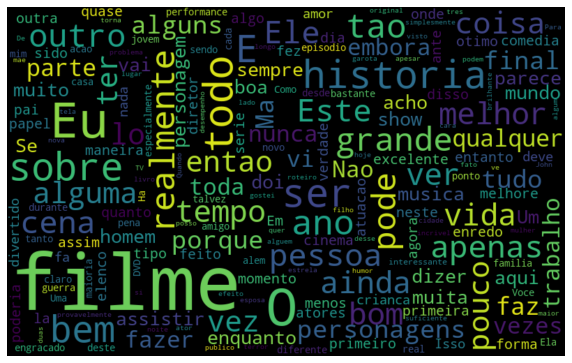

In [59]:
nuvem_palavras_pos(resenha, "tratamento_3")

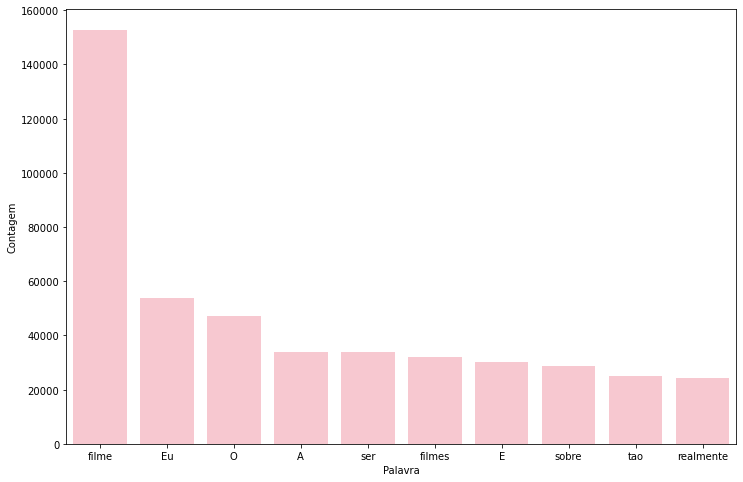

In [60]:
pareto(resenha, "tratamento_3", 10)

In [61]:
# Transformando em minúsculo para que os stop words em maiusculo sejam desconsiderados

frase = "O Thiago é o novo instrutor da Alura"
print(frase.lower())

o thiago é o novo instrutor da alura


In [62]:
frase_processada = list()
for opiniao in resenha["tratamento_3"]:
    nova_frase = list()
    opiniao = opiniao.lower()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in stopwords_sem_acento:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
    
resenha["tratamento_4"] = frase_processada

resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1,tratamento_2,tratamento_3,tratamento_4
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...,Mais vez Sr Costner arrumou filme tempo necess...,vez sr costner arrumou filme tempo necessario ...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes acao mesmos...,exemplo motivo maioria filmes acao mesmos gene...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...,Primeiro tudo odeio raps imbecis poderiam agir...,primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever musicas todos gos...,beatles puderam escrever musicas todos gostass...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...,Filmes fotos latao palavra apropriada verdade ...,filmes fotos latao palavra apropriada verdade ...


In [63]:
resenha["text_pt"][0]

'Mais uma vez, o Sr. Costner arrumou um filme por muito mais tempo do que o necessário. Além das terríveis seqüências de resgate no mar, das quais há muito poucas, eu simplesmente não me importei com nenhum dos personagens. A maioria de nós tem fantasmas no armário, e o personagem Costers é realizado logo no início, e depois esquecido até muito mais tarde, quando eu não me importava. O personagem com o qual deveríamos nos importar é muito arrogante e superconfiante, Ashton Kutcher. O problema é que ele sai como um garoto que pensa que é melhor do que qualquer outra pessoa ao seu redor e não mostra sinais de um armário desordenado. Seu único obstáculo parece estar vencendo Costner. Finalmente, quando estamos bem além do meio do caminho, Costner nos conta sobre os fantasmas dos Kutchers. Somos informados de por que Kutcher é levado a ser o melhor sem pressentimentos ou presságios anteriores. Nenhuma mágica aqui, era tudo que eu podia fazer para não desligar uma hora.'

In [64]:
acuracia_tratamento4 = classificar_texto(resenha, "tratamento_4", "classificacao")
print('A acurácia do tratamento_4 foi', acuracia_tratamento4)
print('A acurácia do tratamento_3 foi',acuracia_tratamento3)

A acurácia do tratamento_4 foi 0.6879094217549535
A acurácia do tratamento_3 foi 0.6810351799433886


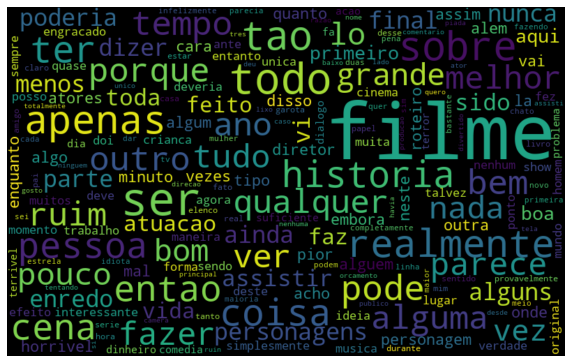

In [65]:
nuvem_palavras_neg(resenha, "tratamento_4")

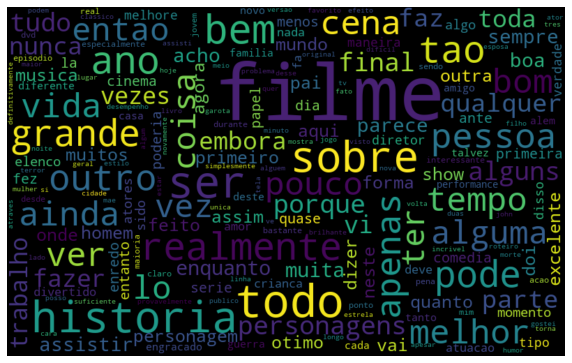

In [66]:
nuvem_palavras_pos(resenha, "tratamento_4")

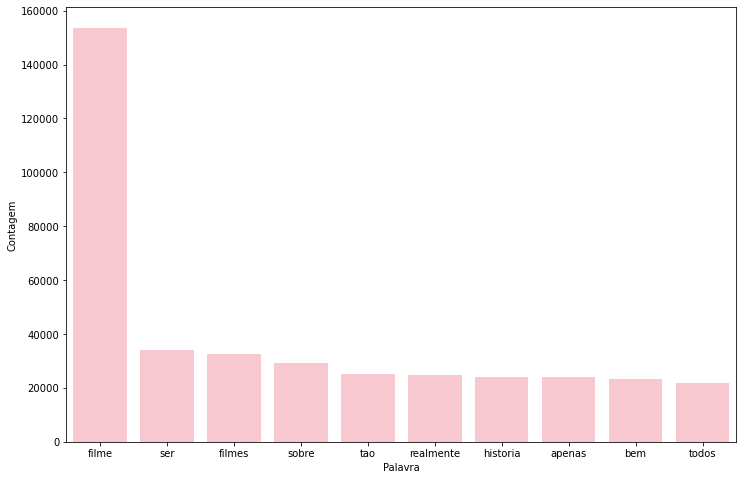

In [67]:
pareto(resenha, "tratamento_4", 10)

### Stemmer

Utilizando algorítimo RSLP que remove o sufixos das palavras transformando-as em um único radical comum\
*Para cada lingua tem um stemitizador diferente

In [68]:
stemmer = nltk.RSLPStemmer()
stemmer.stem("corredor")

'corr'

In [69]:
stemmer = nltk.RSLPStemmer()
stemmer.stem("corre")

'corr'

In [70]:
stemmer = nltk.RSLPStemmer()
stemmer.stem("correria")

'corr'

In [71]:
#Implementando tratamento de stemmer

frase_processada = list()
for opiniao in resenha["tratamento_4"]:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in stopwords_sem_acento:
            nova_frase.append(stemmer.stem(palavra))
    frase_processada.append(' '.join(nova_frase))
    
resenha["tratamento_5"] = frase_processada

resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1,tratamento_2,tratamento_3,tratamento_4,tratamento_5
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...,Mais vez Sr Costner arrumou filme tempo necess...,vez sr costner arrumou filme tempo necessario ...,vez sr costn arrum film temp necessari alem te...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes acao mesmos...,exemplo motivo maioria filmes acao mesmos gene...,exempl motiv maior film aca mesm gener chat na...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...,Primeiro tudo odeio raps imbecis poderiam agir...,primeiro tudo odeio raps imbecis poderiam agir...,prim tud odei rap imbecil pod agir arm pressio...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever musicas todos gos...,beatles puderam escrever musicas todos gostass...,beatl pud escrev music tod gost emb walt hill ...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...,Filmes fotos latao palavra apropriada verdade ...,filmes fotos latao palavra apropriada verdade ...,film fot lata palavr apropri verdad tant ous q...


In [79]:
acuracia_tratamento5 = classificar_texto(resenha, "tratamento_5", "classificacao")
print('A acurácia do tratamento 5 foi: ' , acuracia_tratamento5)
print('A acurácia do tratamento 4 foi: ' , acuracia_tratamento4)

A acurácia do tratamento 5 foi:  0.6943792964011323
A acurácia do tratamento 4 foi:  0.6879094217549535


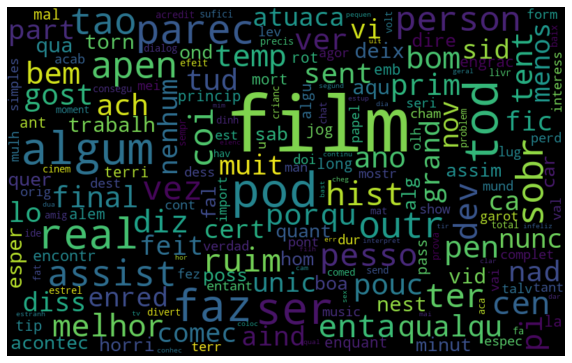

In [73]:
nuvem_palavras_neg(resenha, "tratamento_5")

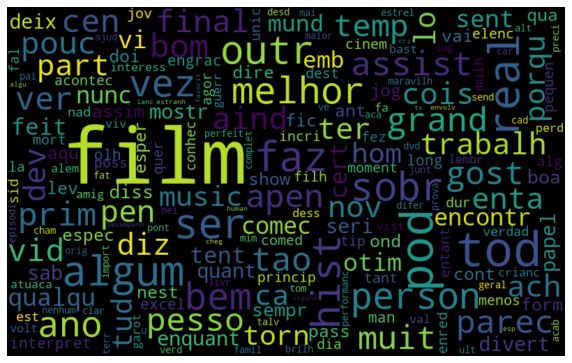

In [74]:
nuvem_palavras_pos(resenha, "tratamento_5")

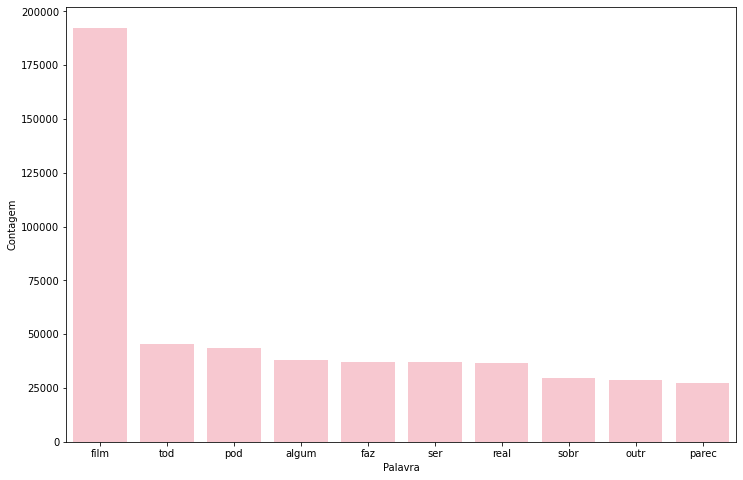

In [75]:
pareto(resenha, "tratamento_5", 10)

### TF- IDF

Ele monta um bag-of-words, porém as palavras com maior frequência terão peso menor, ou seja, menos capacidade de diferenciação.\
A principal característica do TF-IDF é ser uma pontuação proporcional à frequencia da palavra no texto e equilibrada pela frequencia no corpus, ou seja, palavras que se repetem muito em todo o corpus tendem a ter pontuacoes menores. Embora Ngrams seja um método que pode otimizar o resultado, devemos ter cuidado, já que ao utiliza-lo o nosso vetor Bag of words aumenta consideravelmente de tamanho, o que também faz com que o custo computacional aumente

In [80]:
#importando o TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

frases = ["Assisti um filme ótimo", "Assisti um filme péssimo"]

tfidf = TfidfVectorizer(lowercase= False, max_features = 50)

#transformando dados esparços numa matriz convencional
caracteristicas = tfidf.fit_transform(frases)
pd.DataFrame(
    caracteristicas.todense(),
    columns = tfidf.get_feature_names()
)

,Assisti,filme,péssimo,um,ótimo
0,0.448321,0.448321,0.000000,0.448321,0.630099
1,0.448321,0.448321,0.630099,0.448321,0.000000


In [85]:
from sklearn.linear_model import LogisticRegression


#aplicando o tfidf nos dados brutos
tfidf_bruto = tfidf.fit_transform(resenha["text_pt"])

#separando as classes dos dados brutos
treino, teste, classe_treino, classe_teste = train_test_split(tfidf_bruto,
                                                             resenha["classificacao"],
                                                             random_state = 42)
regressao_logistica = LogisticRegression()
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_bruto = regressao_logistica.score(teste, classe_teste)
print('A acurácia do TF -IDF nos dados brutos foi: ', acuracia_tfidf_bruto)

A acurácia do TF -IDF nos dados brutos foi:  0.6600889607763849


In [87]:
#aplicando o tfidf nos dados tratados
tfidf_tratados = tfidf.fit_transform(resenha["tratamento_5"])

#separando as classes dos dados brutos
treino, teste, classe_treino, classe_teste = train_test_split(tfidf_tratados,
                                                             resenha["classificacao"],
                                                             random_state = 42)
regressao_logistica = LogisticRegression()
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_tratados = regressao_logistica.score(teste, classe_teste)
print(' A acuracia do TF-IDF nos dados tratados foi: ', acuracia_tfidf_tratados)

 A acuracia do TF-IDF nos dados tratados foi:  0.6988273352203801


### Ngrams
Mantém estrutura de sequência e reforça as palavras 
Analisar o custo antes de aplicar, pois se selecionarmos "bigramas"ele vai dobrar as dimensões, invés de 50 dimensões teríamos 100

In [90]:
from nltk import ngrams

#separando de 2 em 2
frase = "Assisti um ótimo filme."
frase_separada = token_espaco.tokenize(frase)
pares = ngrams(frase_separada, 2)
list(pares)

[('Assisti', 'um'), ('um', 'ótimo'), ('ótimo', 'filme.')]

In [93]:
# rodando com ngram
# quero que meu vetor contenha palavras isoladas e palavras em bigramas
# ngram_range = quero 1 unica palavra, e 2 palavras em sequencia

tfidf = TfidfVectorizer(lowercase = False, ngram_range = (1,2))
vetor_tfidf = tfidf.fit_transform(resenha["tratamento_5"])
treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf, 
                                                              resenha["classificacao"],
                                                              random_state = 42)
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_ngrams = regressao_logistica.score(teste, classe_teste)
print(" A acurácia do TFIDF com ngrams é: ", acuracia_tfidf_ngrams)

 A acurácia do TFIDF com ngrams é:  0.8858875859280226


In [94]:
#rodando o tfidf sem o ngrams

tfidf = TfidfVectorizer(lowercase = False)
vetor_tfidf = tfidf.fit_transform(resenha["tratamento_5"])
treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf, 
                                                              resenha["classificacao"],
                                                              random_state = 42)
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf = regressao_logistica.score(teste, classe_teste)
print(" A acurácia do TFIDF é: ", acuracia_tfidf)

 A acurácia do TFIDF é:  0.8841892438334007


In [96]:
#consultando os pesos das palavras
#entendendo como a regressão logistica entende oq é positivo e o que é negativo
pesos = pd.DataFrame(
       regressao_logistica.coef_[0].T,
       index = tfidf.get_feature_names()
)
pesos.nlargest(10,0)

,0
otim,8.290451
excel,7.978024
perfeit,6.578863
favorit,5.778016
maravilh,5.286499
incri,5.049494
hilari,4.653810
divert,4.579558
ador,4.422221
brilh,4.268574


In [97]:
#consultando peso das palavras negativas
pesos.nsmallest(10,0)

,0
pi,-9.175668
ruim,-9.169677
horri,-8.751660
terri,-7.186900
chat,-6.919297
nad,-6.029845
infeliz,-5.310530
decepca,-4.995845
ridicul,-4.950822
nenhum,-4.918823
